# Banana Quality 

Dataset: https://www.kaggle.com/datasets/mrmars1010/banana-quality-dataset

Purpose: To analyze banana quality of different nations

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Banana Quality\banana_quality_dataset.csv')

In [3]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


## Data Cleaning

1. Remove duplicates
2. Handle missing values
3. Standardize formats
4. Validate ranges
5. Rename columns

In [4]:
df.shape

(1000, 16)

In [6]:
# Check for and remove duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [7]:
# Check for missing values
missing_value_count = df.isnull().sum()
missing_value_count

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

In [8]:
# Standardize formats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [9]:
# Check text columns if formats are consistent
print(df['variety'].value_counts())
print()
print(df['region'].value_counts())
print()
print(df['quality_category'].value_counts())
print()
print(df['ripeness_category'].value_counts())

Plantain       146
Fehi           134
Cavendish      133
Burro          125
Manzano        119
Lady Finger    117
Red Dacca      113
Blue Java      113
Name: variety, dtype: int64

Ecuador        137
Colombia       136
India          133
Costa Rica     130
Philippines    127
Guatemala      126
Honduras       107
Brazil         104
Name: region, dtype: int64

Processing    506
Good          434
Unripe         35
Premium        25
Name: quality_category, dtype: int64

Ripe        349
Turning     310
Green       174
Overripe    167
Name: ripeness_category, dtype: int64


In [10]:
# Convert date column from object to datetime
df['harvest_date'] = pd.to_datetime(df['harvest_date'])

In [11]:
df['harvest_date']

0     2023-10-16
1     2023-10-14
2     2023-09-08
3     2023-10-07
4     2023-10-02
         ...    
995   2023-10-04
996   2023-09-23
997   2023-10-19
998   2023-09-22
999   2023-09-29
Name: harvest_date, Length: 1000, dtype: datetime64[ns]

In [12]:
# Validate ranges of number columns
df.describe()

,sample_id,quality_score,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.465160,4.042170,18.516830,2.706840,19.882100,164.738930,10.879600,723.556700,1972.992800,104.391300
std,288.819436,0.540909,1.753211,2.034812,1.289252,5.736318,49.163073,5.215554,427.372855,564.467912,53.607794
min,1.000000,0.920000,1.020000,15.000000,0.500000,10.000000,81.050000,2.000000,0.400000,1000.500000,10.000000
25%,250.750000,2.090000,2.447500,16.827500,1.590000,14.902500,122.397500,6.300000,353.950000,1498.750000,60.150000
50%,500.500000,2.440000,4.110000,18.500000,2.680000,19.890000,163.365000,10.700000,726.000000,1957.400000,104.100000
75%,750.250000,2.850000,5.562500,20.312500,3.820000,24.800000,205.775000,15.600000,1071.725000,2431.800000,149.850000
max,1000.000000,3.890000,7.000000,21.980000,5.000000,29.950000,249.890000,20.000000,1498.400000,2992.000000,199.900000


## Analysis

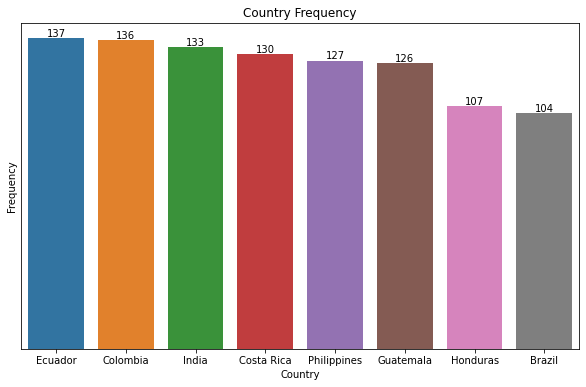

In [48]:
# What is the frequency of each nation?
country_count = df['region'].value_counts().reset_index()

# Bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=country_count, x='index', y='region')
ax.bar_label(ax.containers[0], fontsize=10)
plt.yticks([])
plt.title("Country Frequency")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

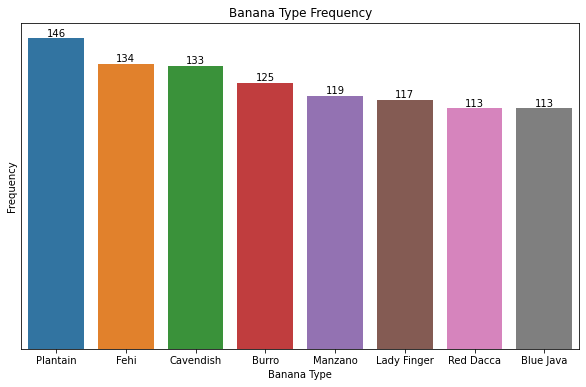

In [50]:
# What is the frequency of banana types?
banana_type_count = df['variety'].value_counts().reset_index()

# Bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=banana_type_count, x='index', y='variety')
ax.bar_label(ax.containers[0], fontsize=10)
plt.yticks([])
plt.title("Banana Type Frequency")
plt.xlabel("Banana Type")
plt.ylabel("Frequency")
plt.show()

In [65]:
# What are the average banana characteristics per banana type?
avg_banana_char = df.groupby(by=['variety'])[
    ['quality_score',
     'length_cm',
     'weight_g',
     'ripeness_index',
     'sugar_content_brix',
     'firmness_kgf'
    ]
].mean().round(2).sort_values(by=['quality_score'], ascending=False).reset_index()
avg_banana_char

,variety,quality_score,length_cm,weight_g,ripeness_index,sugar_content_brix,firmness_kgf
0,Lady Finger,2.53,19.57,162.80,4.23,18.86,2.68
1,Blue Java,2.52,20.75,164.62,4.23,18.39,2.59
2,Burro,2.51,20.41,164.90,4.06,18.62,2.52
3,Plantain,2.46,18.93,166.04,4.09,18.71,2.72
4,Red Dacca,2.45,20.15,164.43,3.94,18.52,2.80
5,Cavendish,2.43,18.85,170.63,4.05,18.56,2.82
6,Fehi,2.43,19.87,156.17,4.03,18.26,2.73
7,Manzano,2.39,20.90,168.34,3.72,18.19,2.77


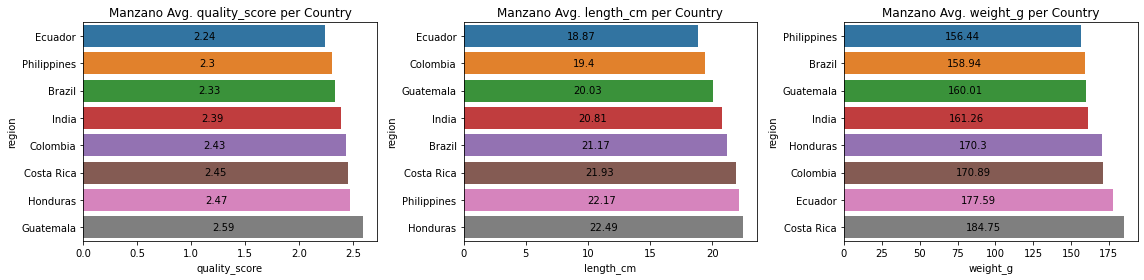

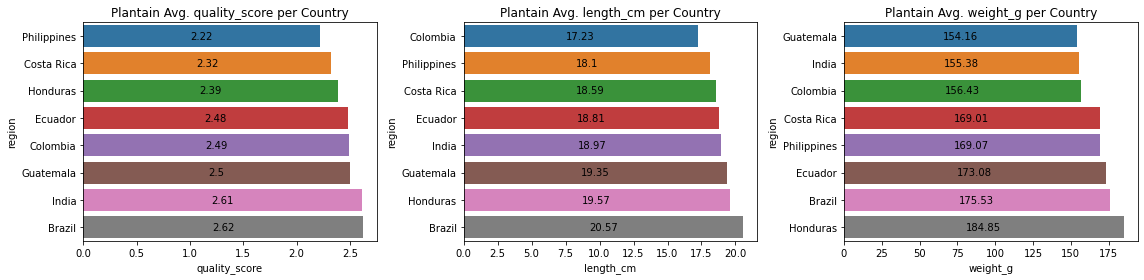

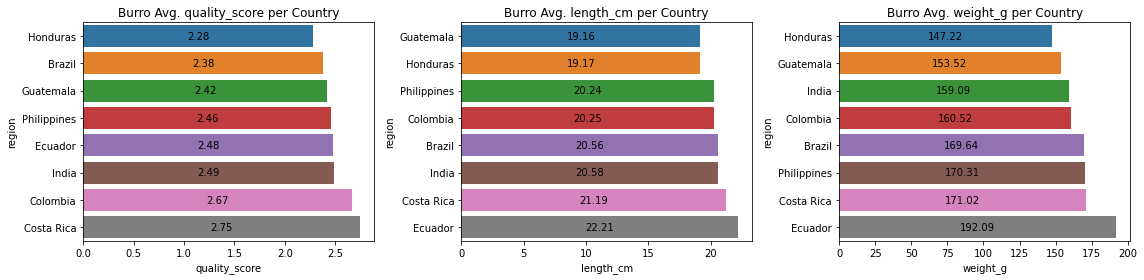

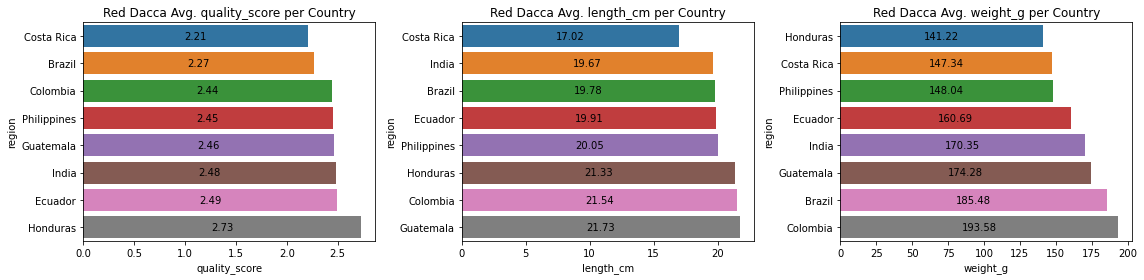

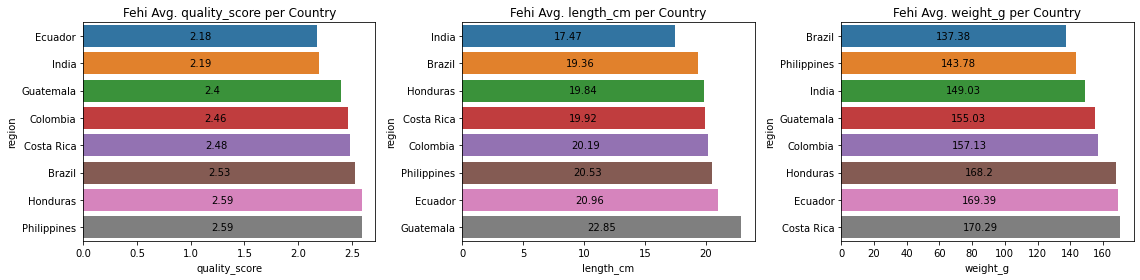

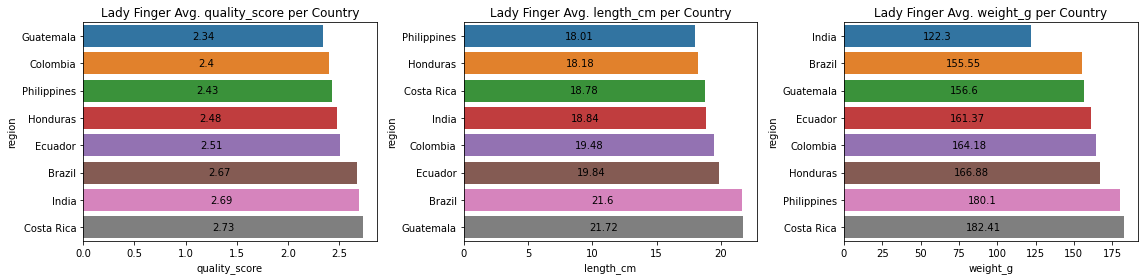

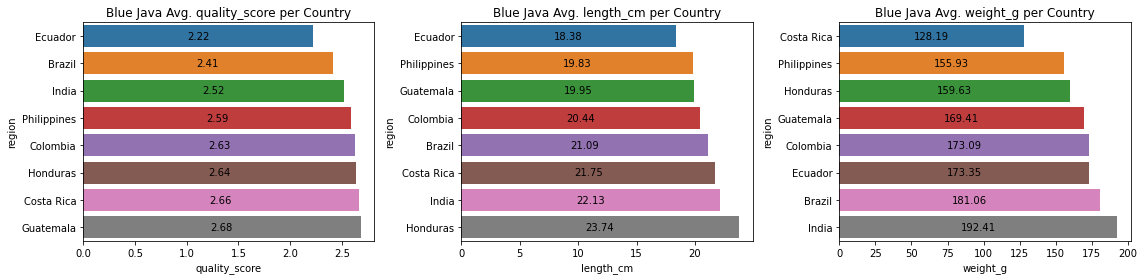

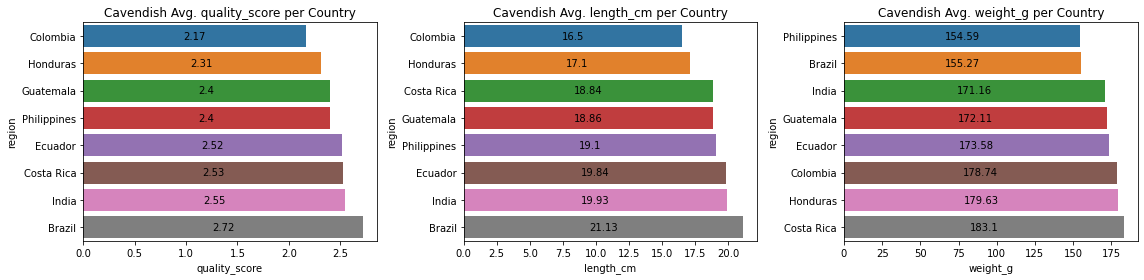

In [143]:
# What are each nation's average characteristics for each type of banana?
country_df = df.groupby(by=['region', 'variety'])[
    ['quality_score',
     'length_cm',
     'weight_g',
     'ripeness_index',
     'sugar_content_brix',
     'firmness_kgf'
    ]
].mean().round(2).sort_values(by=['region', 'variety']).reset_index()

# List banana types and specific columns in a list
banana_types = df['variety'].unique().tolist()
columns = ['quality_score', 'length_cm', 'weight_g']

# Takes in a dataframe, dataframe columns list, and banana type list to produce plots 
# of the averages of columns for each banana type
def plot_avg_features(df, columns, banana_types):
    for b_type in banana_types:
        fig, ax = plt.subplots(1, 3, figsize=(16, 4))
        
        # Used to determine subplot column
        subplot_col = 0
        for column in columns:
            sns.barplot(data=df[df['variety'] == b_type].sort_values(
                by=[column]), x=column, y='region', ax=ax[subplot_col])
            ax[subplot_col].bar_label(ax[subplot_col].containers[0], label_type='center', fontsize=10)
            ax[subplot_col].set_title(f"{b_type} Avg. {column} per Country")
            subplot_col += 1

        plt.tight_layout()
        plt.show()

plot_avg_features(country_df, columns, banana_types)

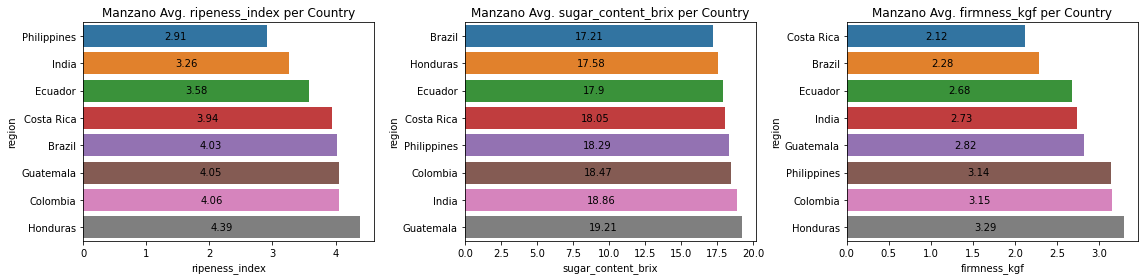

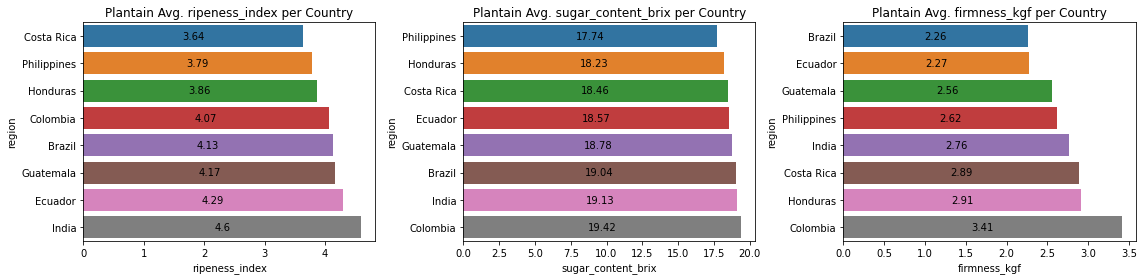

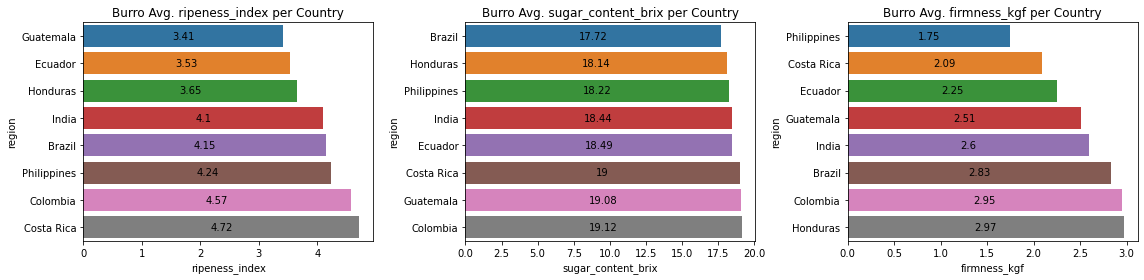

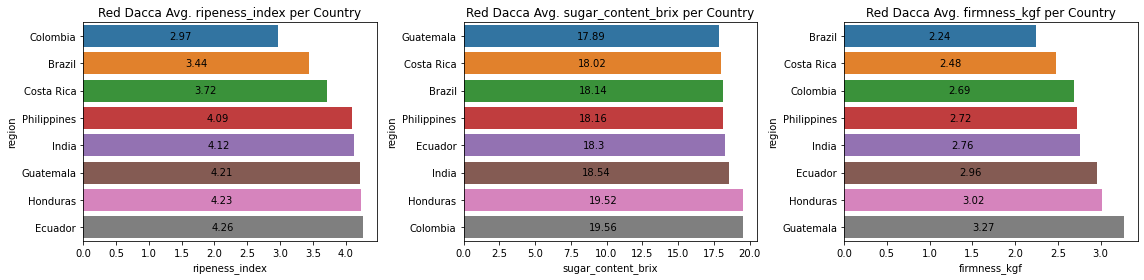

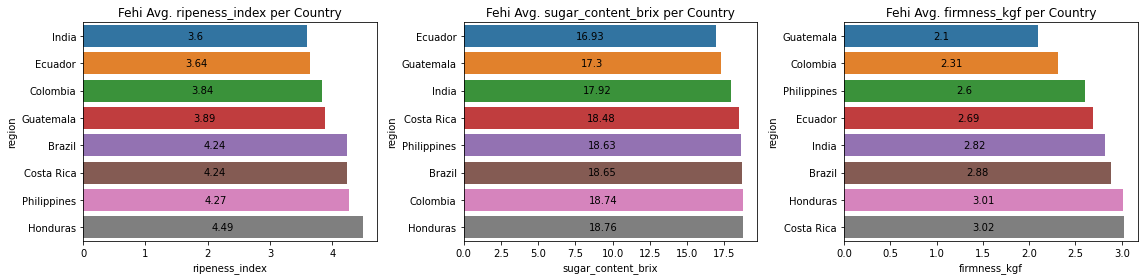

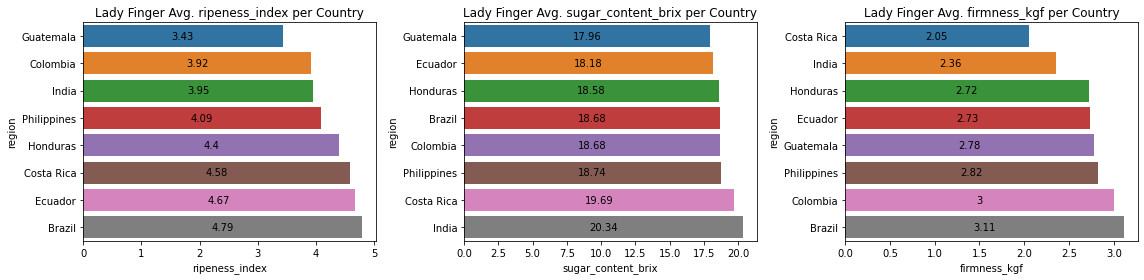

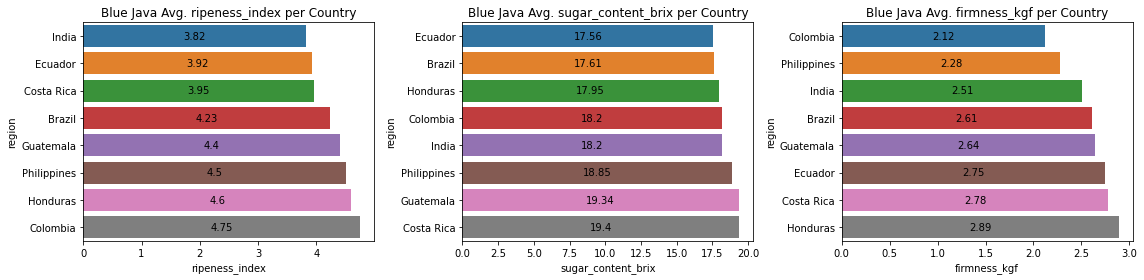

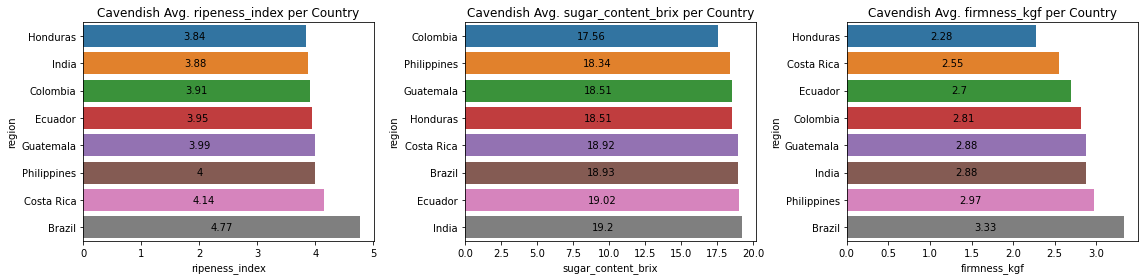

In [144]:
# List columns to be plotted
columns = ['ripeness_index', 'sugar_content_brix', 'firmness_kgf']

# Plot 
plot_avg_features(country_df, columns, banana_types)